# Reading data

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing file standarized in SQL

In [2]:
df = pd.read_csv("CleanTable.csv")

In [3]:
df.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


# EDA

## Dropping decimals and converting numerical columns into integers

In [4]:
df[["Q1_Balance", "Q2_Balance", "Q3_Balance", "Q4_Balance"]] = df[["Q1_Balance", "Q2_Balance", "Q3_Balance", "Q4_Balance"]].astype(int)

In [5]:
df["Average_Balance"] = df["Average_Balance"].apply(np.round).astype(int)

In [6]:
df.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1161,1669,877,1095,1002
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147,39,106,78,366
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276,367,352,145,242
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219,1578,1760,1119,419
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211,2140,1357,982,365


## Analysing Categorical Values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Customer_Number       17976 non-null  int64 
 1   Offer_Accepted        17976 non-null  object
 2   Reward                17976 non-null  object
 3   Mailer_Type           17976 non-null  object
 4   Income_Level          17976 non-null  object
 5   Bank_Accounts_Open    17976 non-null  int64 
 6   Overdraft_Protection  17976 non-null  object
 7   Credit_Rating         17976 non-null  object
 8   Credit_Cards_Held     17976 non-null  int64 
 9   Homes_Owned           17976 non-null  int64 
 10  Household_Size        17976 non-null  int64 
 11  Own_Your_Home         17976 non-null  object
 12  Average_Balance       17976 non-null  int64 
 13  Q1_Balance            17976 non-null  int64 
 14  Q2_Balance            17976 non-null  int64 
 15  Q3_Balance            17976 non-null

In [8]:
df["Own_Your_Home"].value_counts()

Yes    11636
No      6340
Name: Own_Your_Home, dtype: int64

In [9]:
df["Homes_Owned"].value_counts()

1    14502
2     3289
3      185
Name: Homes_Owned, dtype: int64

In [10]:
df["Credit_Rating"].value_counts()

High      6064
Medium    5964
Low       5948
Name: Credit_Rating, dtype: int64

In [11]:
df["Overdraft_Protection"].value_counts()

No     15300
Yes     2676
Name: Overdraft_Protection, dtype: int64

In [12]:
df["Income_Level"].value_counts()

Medium    9002
High      4519
Low       4455
Name: Income_Level, dtype: int64

In [13]:
df["Mailer_Type"].value_counts()

Postcard    9134
Letter      8842
Name: Mailer_Type, dtype: int64

In [14]:
df["Reward"].value_counts()

Air Miles    6047
Cash Back    5995
Points       5934
Name: Reward, dtype: int64

In [15]:
df["Offer_Accepted"].value_counts()

No     16955
Yes     1021
Name: Offer_Accepted, dtype: int64

## Finding Correlations

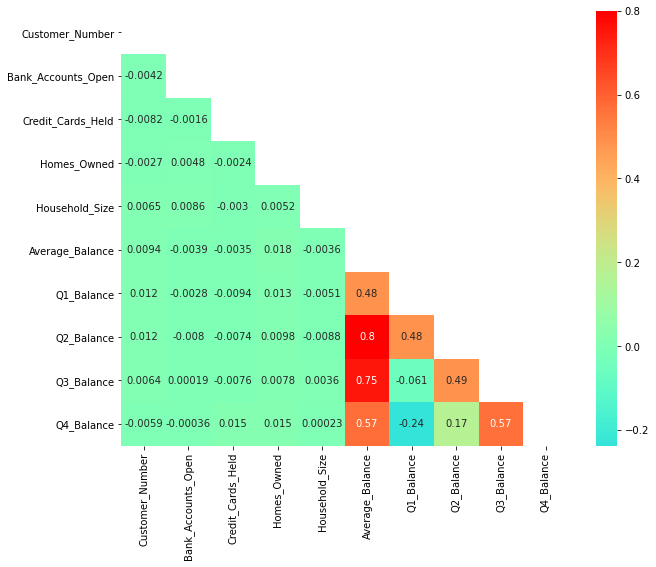

In [16]:
mask = np.zeros_like(df.drop('Offer_Accepted', axis=1).corr())
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize = (10, 8))
sns.heatmap(df.drop('Offer_Accepted', axis=1).corr(),
           annot=True,
           center=0,
           mask=mask,
           cmap='rainbow')
plt.show();

We can see that the quarterly balances are correlated with the average balance. Maybe we should drop them in the future to increase the quality of our predictions.

## Plotting the data in a scatter matrix

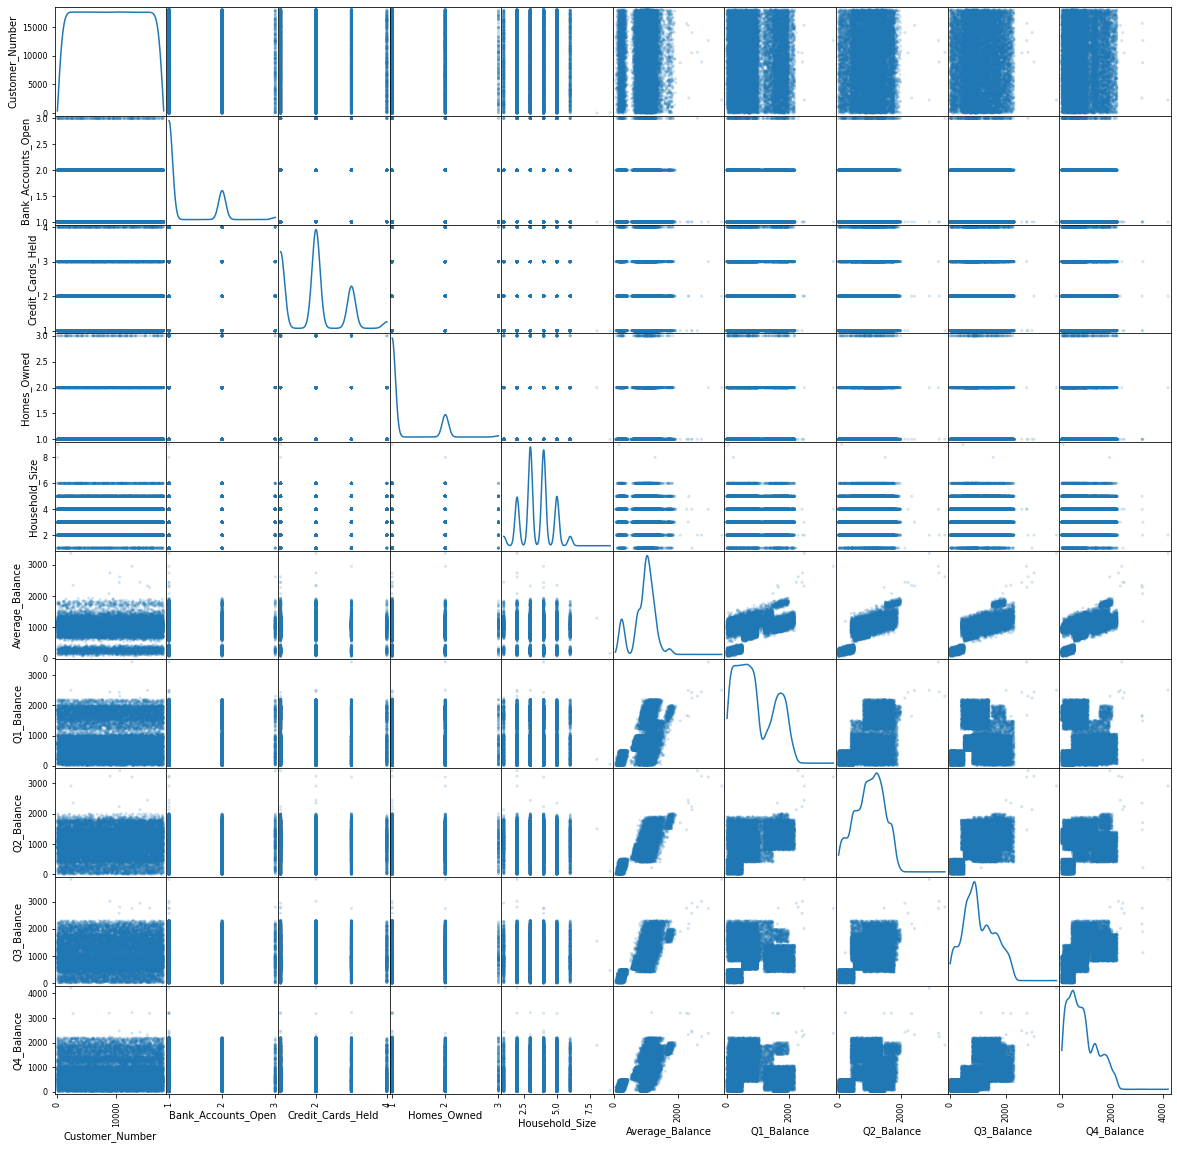

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize = (20,20), diagonal = "kde");

## Dropping "Customer_Number"

In [18]:
 df = df.drop("Customer_Number", axis=1)

## Finding and analyzing outliers

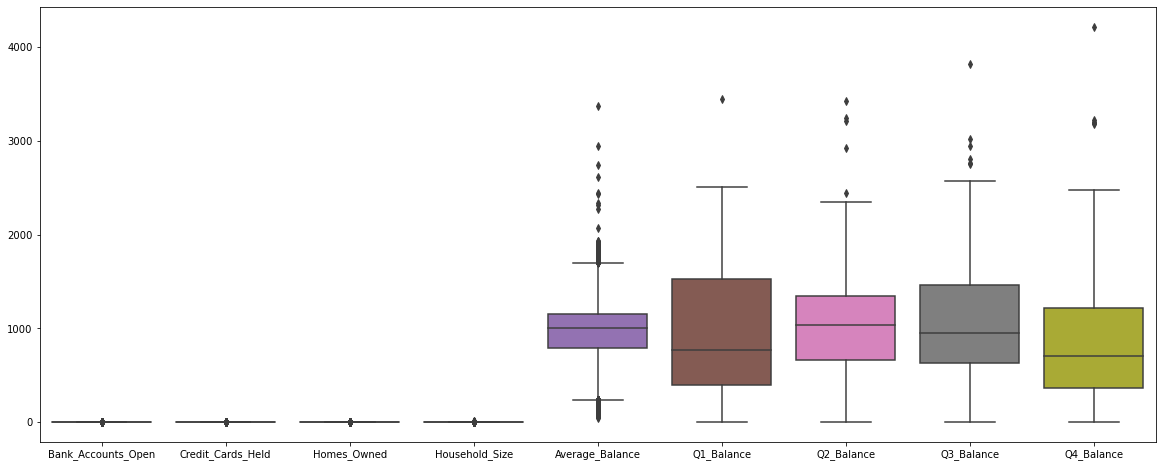

In [19]:
plt.figure(figsize = (20, 8))
sns.boxplot(data=df);

It doesn't seems as if there's any unrealistic value despite we can find some outliers in the balance's columns.

# Preparing data set for modeling

## Extracting numerical values

In [20]:
from sklearn.preprocessing import Normalizer

X = df.select_dtypes(include = np.number)

## Trying different scalers

### Normalizer

In [21]:
transformer = Normalizer()
transformer.fit(X)
x_normalized = transformer.transform(X)

In [22]:
x_nor = pd.DataFrame(x_normalized, columns=X.columns)

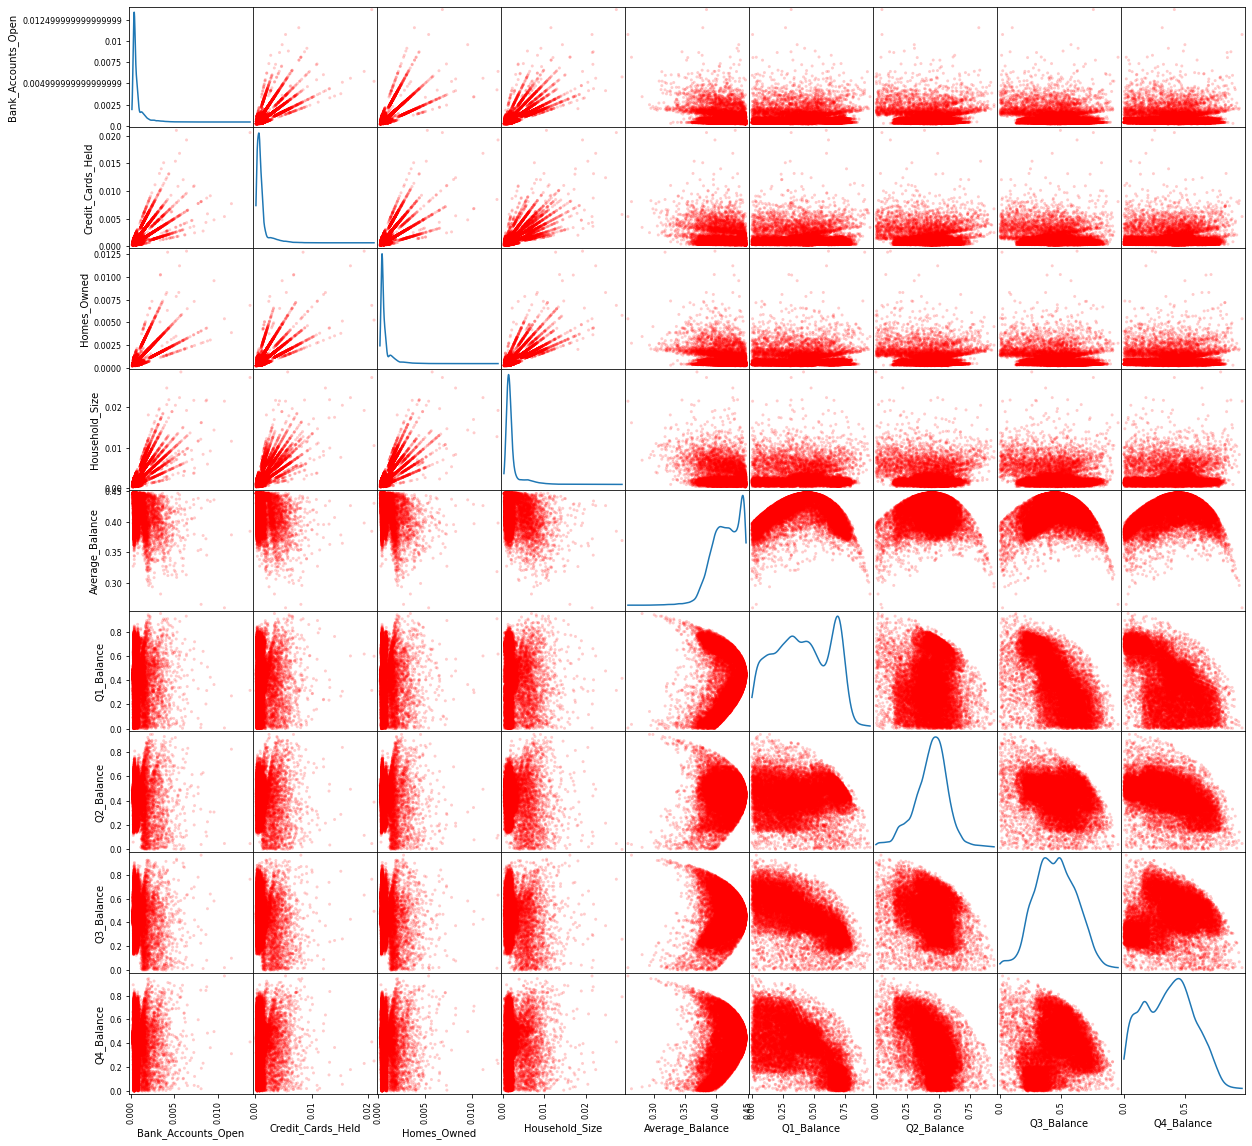

In [23]:
scatter_matrix(x_nor, alpha=0.2, figsize = (20,20), diagonal = "kde", color ="red");

In [24]:
x_nor.head()

,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance
0,0.000375,0.000750,0.000375,0.001501,0.435542,0.626115,0.329001,0.410782,0.375894
1,0.002394,0.004789,0.004789,0.011971,0.351961,0.093377,0.253795,0.186755,0.876311
2,0.003107,0.003107,0.001553,0.003107,0.428760,0.570127,0.546825,0.225254,0.375942
3,0.000686,0.000343,0.000343,0.001372,0.418079,0.541205,0.603626,0.383782,0.143704
4,0.000334,0.000667,0.000334,0.002002,0.404000,0.713922,0.452707,0.327604,0.121767


### StandardScaler

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
transformer = StandardScaler()
transformer.fit(X)
x_standarized = transformer.transform(X)

In [27]:
x_std = pd.DataFrame(x_standarized, columns=X.columns)

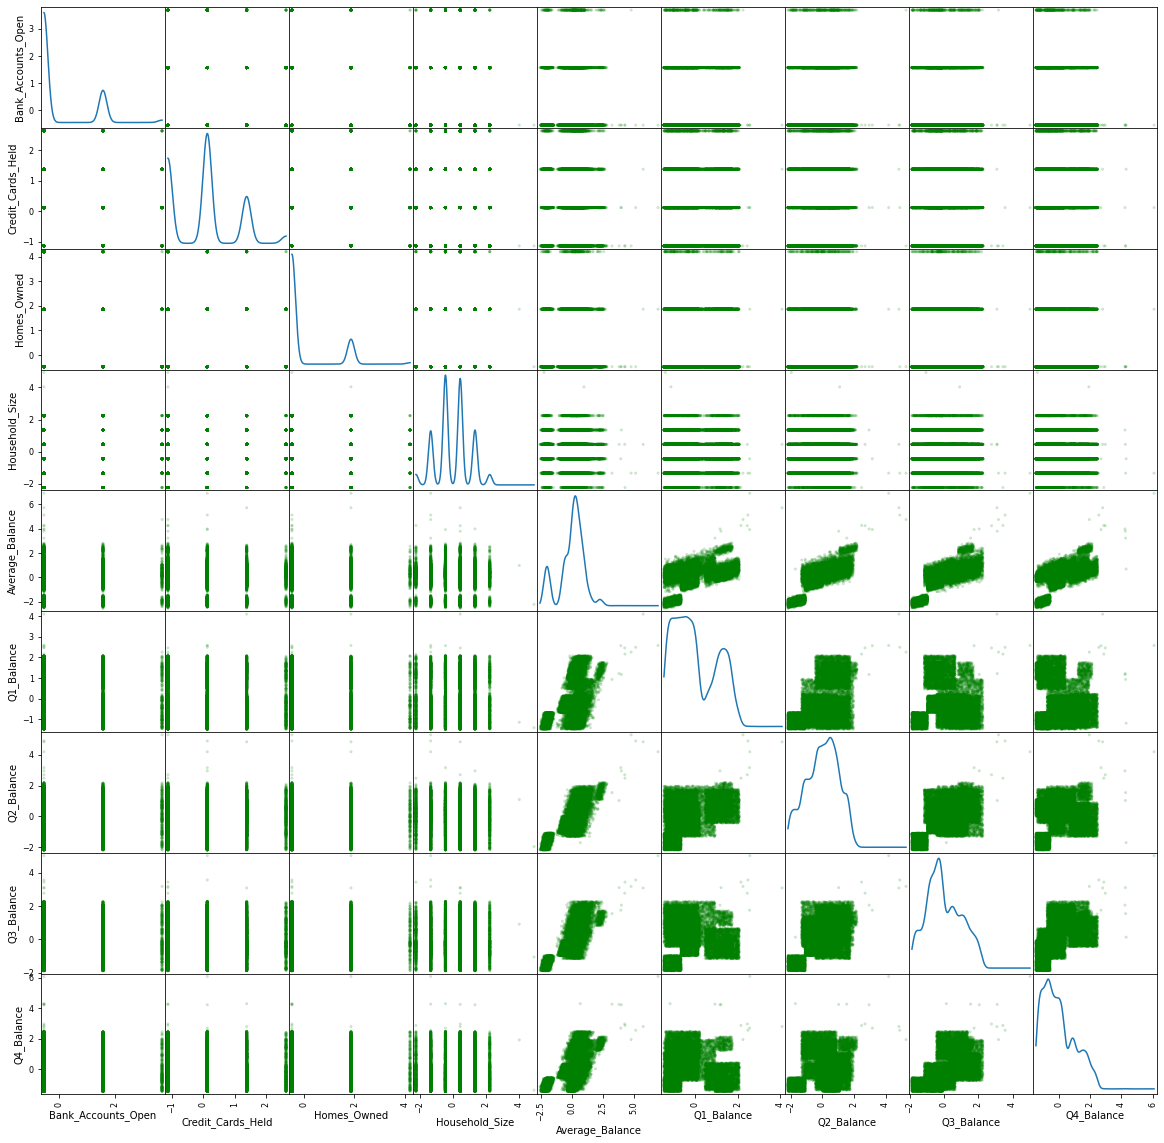

In [28]:
scatter_matrix(x_std, alpha=0.2, figsize = (20,20), diagonal = "kde", color ="green");

In [29]:
x_std.head()

,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance
0,-0.541352,0.121161,-0.476212,0.449452,0.629450,1.223349,-0.267589,0.095704,0.343147
1,-0.541352,0.121161,1.863330,1.346760,-2.265333,-1.405430,-1.953241,-1.741902,-0.794628
2,1.575537,0.121161,-0.476212,-1.345162,-1.897061,-0.876449,-1.415407,-1.620841,-1.016458
3,1.575537,-1.133443,-0.476212,0.449452,0.795030,1.076589,1.662932,0.139070,-0.699813
4,-0.541352,0.121161,-0.476212,2.244067,0.772191,1.982953,0.781845,-0.108474,-0.796417


After alysing both scalers, we've decided to stick first to the normalizer as data seems to adjust better. We might come back later and use the standarized data for better results.

In [30]:
cat = df.select_dtypes(include = object)

In [31]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Offer_Accepted        17976 non-null  object
 1   Reward                17976 non-null  object
 2   Mailer_Type           17976 non-null  object
 3   Income_Level          17976 non-null  object
 4   Overdraft_Protection  17976 non-null  object
 5   Credit_Rating         17976 non-null  object
 6   Own_Your_Home         17976 non-null  object
dtypes: object(7)
memory usage: 983.2+ KB


## Getting dummies

In [32]:
categorical = pd.get_dummies(cat,
               drop_first=True,
               columns=["Reward", "Mailer_Type", "Income_Level", "Overdraft_Protection", "Credit_Rating", "Own_Your_Home", "Offer_Accepted"])

In [33]:
categorical

,Reward_Cash Back,Reward_Points,Mailer_Type_Postcard,Income_Level_Low,Income_Level_Medium,Overdraft_Protection_Yes,Credit_Rating_Low,Credit_Rating_Medium,Own_Your_Home_Yes,Offer_Accepted_Yes
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,1,0
2,0,0,1,0,0,0,0,1,1,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
17971,1,0,0,0,0,0,1,0,1,0
17972,1,0,0,0,0,0,1,0,1,0
17973,1,0,0,0,0,0,1,0,0,0
17974,1,0,0,0,1,0,0,1,1,0


## Isolating the target value

In [34]:
categorical_clean = categorical.drop("Offer_Accepted_Yes", axis = 1)

In [35]:
categorical_clean

,Reward_Cash Back,Reward_Points,Mailer_Type_Postcard,Income_Level_Low,Income_Level_Medium,Overdraft_Protection_Yes,Credit_Rating_Low,Credit_Rating_Medium,Own_Your_Home_Yes
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,1
2,0,0,1,0,0,0,0,1,1
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
17971,1,0,0,0,0,0,1,0,1
17972,1,0,0,0,0,0,1,0,1
17973,1,0,0,0,0,0,1,0,0
17974,1,0,0,0,1,0,0,1,1


In [36]:
y = categorical["Offer_Accepted_Yes"]

## Concatenating x_nor and categorical_clean

In [37]:
X_full = pd.concat([x_nor, categorical_clean], axis = 1)

In [38]:
X_full

,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance,Reward_Cash Back,Reward_Points,Mailer_Type_Postcard,Income_Level_Low,Income_Level_Medium,Overdraft_Protection_Yes,Credit_Rating_Low,Credit_Rating_Medium,Own_Your_Home_Yes
0,0.000375,0.000750,0.000375,0.001501,0.435542,0.626115,0.329001,0.410782,0.375894,0,0,0,0,0,0,0,0,0
1,0.002394,0.004789,0.004789,0.011971,0.351961,0.093377,0.253795,0.186755,0.876311,0,0,0,0,1,0,0,1,1
2,0.003107,0.003107,0.001553,0.003107,0.428760,0.570127,0.546825,0.225254,0.375942,0,0,1,0,0,0,0,1,1
3,0.000686,0.000343,0.000343,0.001372,0.418079,0.541205,0.603626,0.383782,0.143704,0,0,0,0,1,0,0,0,0
4,0.000334,0.000667,0.000334,0.002002,0.404000,0.713922,0.452707,0.327604,0.121767,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,0.002160,0.002160,0.002160,0.010798,0.362810,0.293703,0.140373,0.153330,0.859513,1,0,0,0,0,0,1,0,1
17972,0.000516,0.001549,0.000516,0.001549,0.438947,0.508146,0.485424,0.486973,0.276278,1,0,0,0,0,0,1,0,1
17973,0.000401,0.000802,0.000401,0.001605,0.436074,0.368276,0.307699,0.469371,0.599351,1,0,0,0,0,0,1,0,0
17974,0.000417,0.001667,0.000833,0.000833,0.425866,0.260853,0.409614,0.360444,0.672968,1,0,0,0,1,0,0,1,1


In [39]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Bank_Accounts_Open        17976 non-null  float64
 1   Credit_Cards_Held         17976 non-null  float64
 2   Homes_Owned               17976 non-null  float64
 3   Household_Size            17976 non-null  float64
 4   Average_Balance           17976 non-null  float64
 5   Q1_Balance                17976 non-null  float64
 6   Q2_Balance                17976 non-null  float64
 7   Q3_Balance                17976 non-null  float64
 8   Q4_Balance                17976 non-null  float64
 9   Reward_Cash Back          17976 non-null  uint8  
 10  Reward_Points             17976 non-null  uint8  
 11  Mailer_Type_Postcard      17976 non-null  uint8  
 12  Income_Level_Low          17976 non-null  uint8  
 13  Income_Level_Medium       17976 non-null  uint8  
 14  Overdr

## Importing libraries for modeling

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Model 1 - Normalized X

## Defining LogisticRegression

In [41]:
lr =  LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr')

## Splitting dataset into train and test set

In [42]:
X_train, X_test, y_train, y_test = train_test_split (X_full, y, test_size = 0.3, random_state=40)

## Fitting the model to our training data set

In [43]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=400, multi_class='ovr', random_state=0)

# Evaluating Model 1

## Predicting the response for test dataset

In [44]:
y_pred=lr.predict(X_test)

## Obtaining the accuracy of the prediction

In [45]:
accuracy_score(y_test,y_pred)

0.9415909512330799

## Creating the confusion matrix

In [46]:
confusion_matrix(y_test,y_pred)

array([[5078,    0],
       [ 315,    0]])

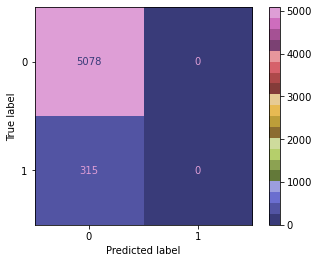

In [47]:
plot_confusion_matrix(lr, X_test, y_test, cmap="tab20b");

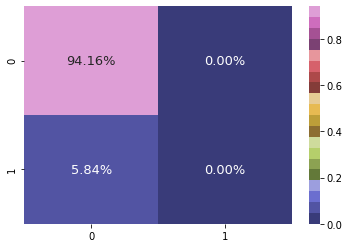

In [48]:
cnfmat = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cnfmat, columns = np.unique(y_test), index = np.unique(y_test))
sns.heatmap(df_cm/df_cm.sum().sum(),
           annot=True,
            fmt='.2%',
            cmap='tab20b',
            annot_kws = {'size':13}
           );

## Plotting the AUC (area under the curve)

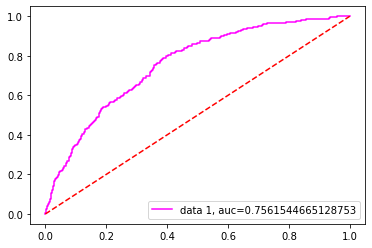

In [49]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc), color='magenta')
plt.plot([0,1],[0,1],'r--') 
plt.legend(loc=4)
plt.show()

Our model seems to be very efficient when precting the "No", but completly unable to predict the "Yes".

## Reviewing how balanced is our target variable

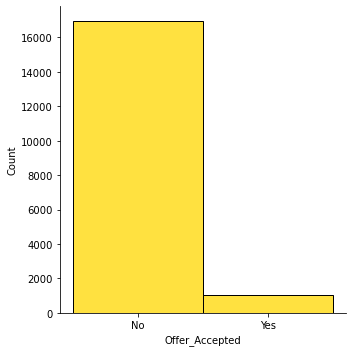

In [125]:
sns.displot(df['Offer_Accepted'], color="gold");

Data seems very imbalanced, we will try to correct this in our next model aiming for a better 'Yes' prediction.

# Model 2 - Implementing SMOTE method

## Importing SMOTE and defining it as "smote"

In [51]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [52]:
X_full.head()

,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance,Reward_Cash Back,Reward_Points,Mailer_Type_Postcard,Income_Level_Low,Income_Level_Medium,Overdraft_Protection_Yes,Credit_Rating_Low,Credit_Rating_Medium,Own_Your_Home_Yes
0,0.000375,0.000750,0.000375,0.001501,0.435542,0.626115,0.329001,0.410782,0.375894,0,0,0,0,0,0,0,0,0
1,0.002394,0.004789,0.004789,0.011971,0.351961,0.093377,0.253795,0.186755,0.876311,0,0,0,0,1,0,0,1,1
2,0.003107,0.003107,0.001553,0.003107,0.428760,0.570127,0.546825,0.225254,0.375942,0,0,1,0,0,0,0,1,1
3,0.000686,0.000343,0.000343,0.001372,0.418079,0.541205,0.603626,0.383782,0.143704,0,0,0,0,1,0,0,0,0
4,0.000334,0.000667,0.000334,0.002002,0.404000,0.713922,0.452707,0.327604,0.121767,0,0,0,0,1,0,0,1,1


## Applying SMOTE to X and Y

In [53]:
X_sm, y_sm =smote.fit_resample(X_full,y)

## Splitting X_sm and y_sm into train and test set

In [54]:
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split (X_sm, y_sm, test_size = 0.3, random_state=40)

## Analysing the change in the distribution

In [55]:
y_train.value_counts()

0    11877
1      706
Name: Offer_Accepted_Yes, dtype: int64

In [56]:
y_sm_train.value_counts()

0    11956
1    11781
Name: Offer_Accepted_Yes, dtype: int64

## Fitting the model to our smote training dataset

In [57]:
lr.fit(X_sm_train,y_sm_train)

LogisticRegression(max_iter=400, multi_class='ovr', random_state=0)

# Evaluating Model 2

## Predicting the response for smote test dataset

In [58]:
y_pred_sm = lr.predict(X_sm_test)

## Obtaining the accuracy of the prediction

In [59]:
accuracy_score(y_sm_test,y_pred_sm)

0.7053966381598349

## Creating the new confusion matrix

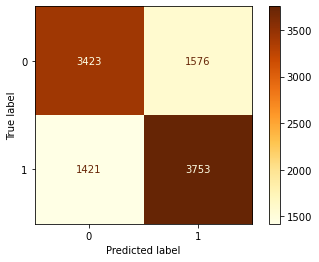

In [60]:
plot_confusion_matrix(lr, X_sm_test, y_sm_test, cmap="YlOrBr");

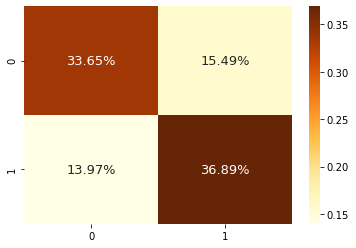

In [61]:
cnfmat = confusion_matrix(y_sm_test, y_pred_sm)
df_cm = pd.DataFrame(cnfmat, columns = np.unique(y_sm_test), index = np.unique(y_sm_test))
sns.heatmap(df_cm/df_cm.sum().sum(),
           annot=True,
            fmt='.2%',
            cmap='YlOrBr',
            annot_kws = {'size':13}
           );

## Plotting the new AUC (area under the curve)

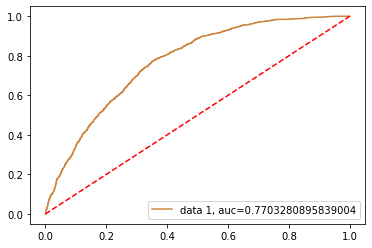

In [62]:
y_sm_pred_proba = lr.predict_proba(X_sm_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_sm_test,  y_sm_pred_proba)
auc = metrics.roc_auc_score(y_sm_test, y_sm_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc), color='peru')
plt.plot([0,1],[0,1],'r--') 
plt.legend(loc=4)
plt.show()

Using this method, we have achieved a significant improvement being able to also predict "Yes" although our overall accuracy has decrease.

# Model 3 - TomekLink Method

## Importing TomekLinks and defining it as "tomek"

In [63]:
from imblearn.under_sampling import TomekLinks
tomek=TomekLinks(sampling_strategy='majority')

## Applying TomekLink to X and Y

In [64]:
X_tk, y_tk = tomek.fit_resample(X_full,y)

## Splitting X_tk and y_tk into train and test set

In [65]:
X_tk_train, X_tk_test, y_tk_train, y_tk_test = train_test_split (X_tk, y_tk, test_size = 0.3, random_state=40)

## Analysing the change in the distribution

In [66]:
y_train.value_counts()

0    11877
1      706
Name: Offer_Accepted_Yes, dtype: int64

In [67]:
y_tk_train.value_counts()

0    11496
1      712
Name: Offer_Accepted_Yes, dtype: int64

## Fitting the model to our tomek training dataset

In [68]:
lr.fit(X_tk_train,y_tk_train)

LogisticRegression(max_iter=400, multi_class='ovr', random_state=0)

# Evaluating Model 3

## Predicting the response for tomek test dataset

In [69]:
y_pred_tk=lr.predict(X_tk_test)

## Obtaining the accuracy of the prediction

In [70]:
accuracy_score(y_tk_test,y_pred_tk)

0.9409403669724771

## Creating the new confusion matrix

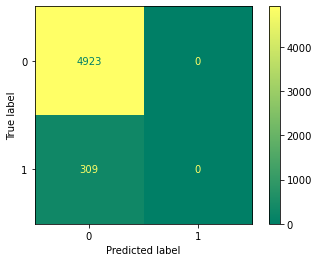

In [71]:
plot_confusion_matrix(lr, X_tk_test, y_tk_test, cmap="summer");

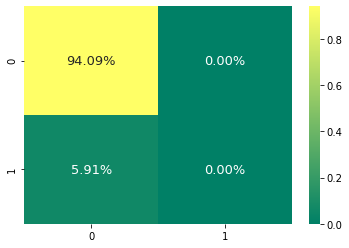

In [72]:
cnfmat = confusion_matrix(y_tk_test, y_pred_tk)
df_cm = pd.DataFrame(cnfmat, columns = np.unique(y_tk_test), index = np.unique(y_tk_test))
sns.heatmap(df_cm/df_cm.sum().sum(),
           annot=True,
            fmt='.2%',
            cmap='summer',
            annot_kws = {'size':13}
           );

## Plotting the new AUC (area under the curve)

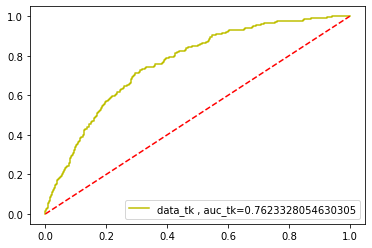

In [73]:
y_tk_pred_proba = lr.predict_proba(X_tk_test)[::,1]
fpr_tk, tpr_tk, _ = metrics.roc_curve(y_tk_test,  y_tk_pred_proba)
auc_tk = metrics.roc_auc_score(y_tk_test, y_tk_pred_proba)

plt.plot(fpr_tk,tpr_tk,label="data_tk , auc_tk="+str(auc_tk), color='y')
plt.plot([0,1],[0,1],'r--') 
plt.legend(loc=4)
plt.show()

This value doesn't affect at all our prediction, as it just drop a few values from the "No" but not enough to make any difference in the confussion matrix.

# Model 4 - Dropping the quarterly balances

## Dropping the quarterly balances

In [74]:
df1 = df.drop(["Q1_Balance", "Q2_Balance", "Q3_Balance", "Q4_Balance"], axis = 1)

In [75]:
df1.head()

,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1161
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211


## Reviewing correlations

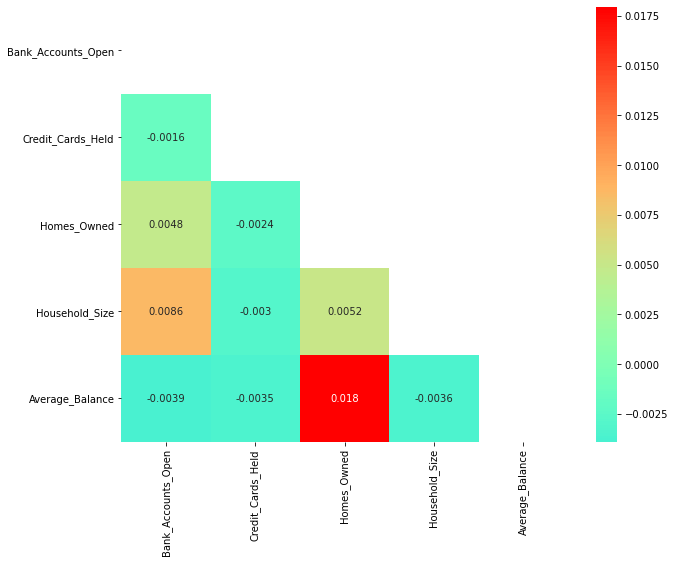

In [76]:
mask = np.zeros_like(df1.drop('Offer_Accepted', axis=1).corr())
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize = (10, 8))
sns.heatmap(df1.drop('Offer_Accepted', axis=1).corr(),
           annot=True,
           center=0,
           mask=mask,
           cmap='rainbow')
plt.show();

## Extracting numerical values

In [77]:
X1 = df1.select_dtypes(include = np.number)

In [78]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Bank_Accounts_Open  17976 non-null  int64
 1   Credit_Cards_Held   17976 non-null  int64
 2   Homes_Owned         17976 non-null  int64
 3   Household_Size      17976 non-null  int64
 4   Average_Balance     17976 non-null  int64
dtypes: int64(5)
memory usage: 702.3 KB


## Applying Normalizer

In [79]:
transformer1 = Normalizer()
transformer1.fit(X1)
x_normalized1 = transformer1.transform(X1)

In [80]:
x_nor1 = pd.DataFrame(x_normalized1, columns=X1.columns)

## Concatenating x_nor1 and categorical_clean

In [81]:
X_full1 = pd.concat([x_nor1, categorical_clean], axis = 1)

In [82]:
X_full1.head()

,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,Average_Balance,Reward_Cash Back,Reward_Points,Mailer_Type_Postcard,Income_Level_Low,Income_Level_Medium,Overdraft_Protection_Yes,Credit_Rating_Low,Credit_Rating_Medium,Own_Your_Home_Yes
0,0.000861,0.001723,0.000861,0.003445,0.999992,0,0,0,0,0,0,0,0,0
1,0.006797,0.013595,0.013595,0.033987,0.999214,0,0,0,0,1,0,0,1,1
2,0.007246,0.007246,0.003623,0.007246,0.999915,0,0,1,0,0,0,0,1,1
3,0.001641,0.000820,0.000820,0.003281,0.999993,0,0,0,0,1,0,0,0,0
4,0.000826,0.001652,0.000826,0.004955,0.999986,0,0,0,0,1,0,0,1,1


## Applying SMOTE to X and Y

In [83]:
X1_sm, y1_sm =smote.fit_resample(X_full1,y)

## Splitting X1_sm and y1_sm into train and test set

In [84]:
X1_sm_train, X1_sm_test, y1_sm_train, y1_sm_test = train_test_split (X1_sm, y1_sm, test_size = 0.3, random_state=40)

## Fitting the model to our new smote training dataset

In [85]:
lr.fit(X1_sm_train,y1_sm_train)

LogisticRegression(max_iter=400, multi_class='ovr', random_state=0)

# Evaluating Model 4

## Predicting the response for the new smote test dataset

In [86]:
y_pred1_sm=lr.predict(X1_sm_test)

In [87]:
y_pred1_sm

array([0, 0, 1, ..., 1, 1, 1], dtype=uint8)

## Reviewing new distribution

In [88]:
y1_sm_train.value_counts()

0    11956
1    11781
Name: Offer_Accepted_Yes, dtype: int64

## Obtaining the accuracy of the prediction

In [89]:
accuracy_score(y1_sm_test,y_pred1_sm)

0.6947803007962253

## Creating the new confusion matrix

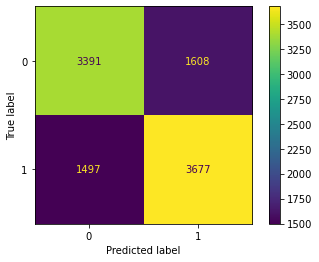

In [90]:
plot_confusion_matrix(lr,X1_sm_test,y1_sm_test);

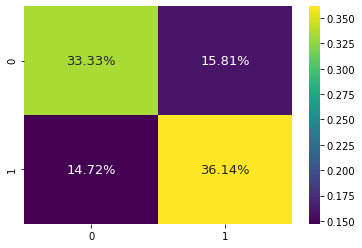

In [91]:
cnfmat = confusion_matrix(y1_sm_test, y_pred1_sm)
df_cm = pd.DataFrame(cnfmat, columns = np.unique(y1_sm_test), index = np.unique(y1_sm_test))
sns.heatmap(df_cm/df_cm.sum().sum(),
           annot=True,
            fmt='.2%',
            cmap='viridis',
            annot_kws = {'size':13}
           );

## Plotting the new AUC (area under the curve)

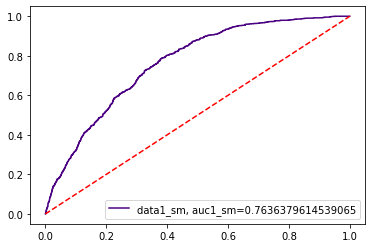

In [92]:
y1_sm_pred_proba = lr.predict_proba(X1_sm_test)[::,1]
fpr1_sm, tpr1_sm, _ = metrics.roc_curve(y1_sm_test,  y1_sm_pred_proba)
auc1_sm = metrics.roc_auc_score(y1_sm_test, y1_sm_pred_proba)

plt.plot(fpr1_sm,tpr1_sm,label="data1_sm, auc1_sm="+str(auc1_sm), color='indigo')
plt.plot([0,1],[0,1],'r--') 
plt.legend(loc=4)
plt.show()

For the moment, this model seems to be the best although the accuracy has slighly drop from the first model, the predictions seems to be much more balance for TP and TF.

# Model 5 -KNN

## Importing KNeighborsClassifier

In [93]:
from sklearn.neighbors import KNeighborsClassifier

## Defining Knn giving it 5 neighbours

After trying different values for Knn, we have come to the conclusion that **n_neighbors = 5** and **p = 2** has given us good accuracy results while avoiding overfitting the sample. 

In [94]:
Knn=KNeighborsClassifier(n_neighbors = 5, p = 2)

## Splitting X1_sm and y1_sm into train and test set

In [95]:
X1_sm_train, X1_sm_test, y1_sm_train, y1_sm_test = train_test_split (X1_sm, y1_sm, test_size = 0.3, random_state=40)

## Fitting Knn to the training sets

In [96]:
Knn.fit(X1_sm_train,y1_sm_train)

KNeighborsClassifier()

# Evaluating Model 5

## Predicting the response for the new smote test dataset using Knn

In [97]:
y_pred_k = Knn.predict(X1_sm_test)

## Obtaining the accuracy of the prediction

In [98]:
accuracy_score(y1_sm_test,y_pred_k)

0.844785215767227

## Creating the new confusion matrix

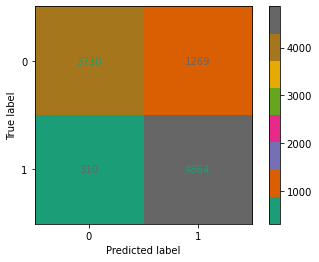

In [99]:
plot_confusion_matrix(Knn ,X1_sm_test,y1_sm_test, cmap='Dark2');

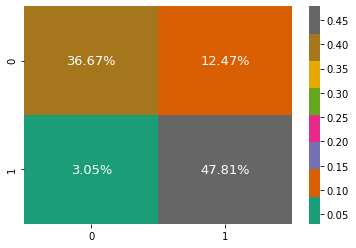

In [100]:
cnfmat = confusion_matrix(y_sm_test, y_pred_k)
df_cm = pd.DataFrame(cnfmat, columns = np.unique(y1_sm_test), index = np.unique(y1_sm_test))
sns.heatmap(df_cm/df_cm.sum().sum(),
           annot=True,
            fmt='.2%',
            cmap='Dark2',
            annot_kws = {'size':13}
           );

## Plotting the new AUC (area under the curve)

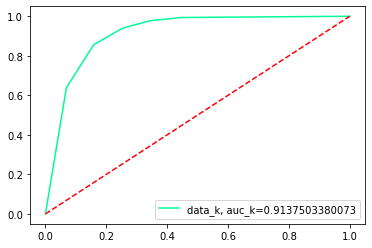

In [101]:
yk_pred_proba = Knn.predict_proba(X1_sm_test)[::,1]
fpr_k, tpr_k, _ = metrics.roc_curve(y1_sm_test,  yk_pred_proba)
auc_k = metrics.roc_auc_score(y1_sm_test, yk_pred_proba)

plt.plot(fpr_k,tpr_k,label="data_k, auc_k="+str(auc_k), color='mediumspringgreen')
plt.plot([0,1],[0,1],'r--') 
plt.legend(loc=4)
plt.show()

This model seems to be most reliable one as the accuracy score remains high while the distribution is balance.

# Comparisons between models

## Accuracy score

- **Model 1:** 0.9415909512330799
- **Model 2:** 0.6994003735377962
- **Model 3:** 0.9409403669724771
- **Model 4:** 0.7027425538189325
- **Model 5:** 0.8471444018480291

## TP/TN - True Negatives / True Positives

- **Model 1:** *TN:* 94.16%  | *TP:* 0.00%
- **Model 2:** *TN:* 33.50%  | *TP:* 36.44%
- **Model 3:** *TN:* 94.09%  | *TP:* 0.00%
- **Model 4:** *TN:* 33.48%  | *TP:* 36.79%
- **Model 5:** *TN:* 36.35%  | *TP:* 47.87%

## AUC value

- **Model 1:** 0.7561544665128753
- **Model 2:** 0.7667500256912612
- **Model 3:** 0.7623328054630305
- **Model 4:** 0.7659901520311793
- **Model 5:** 0.9155597837773972

## AUC PLOT

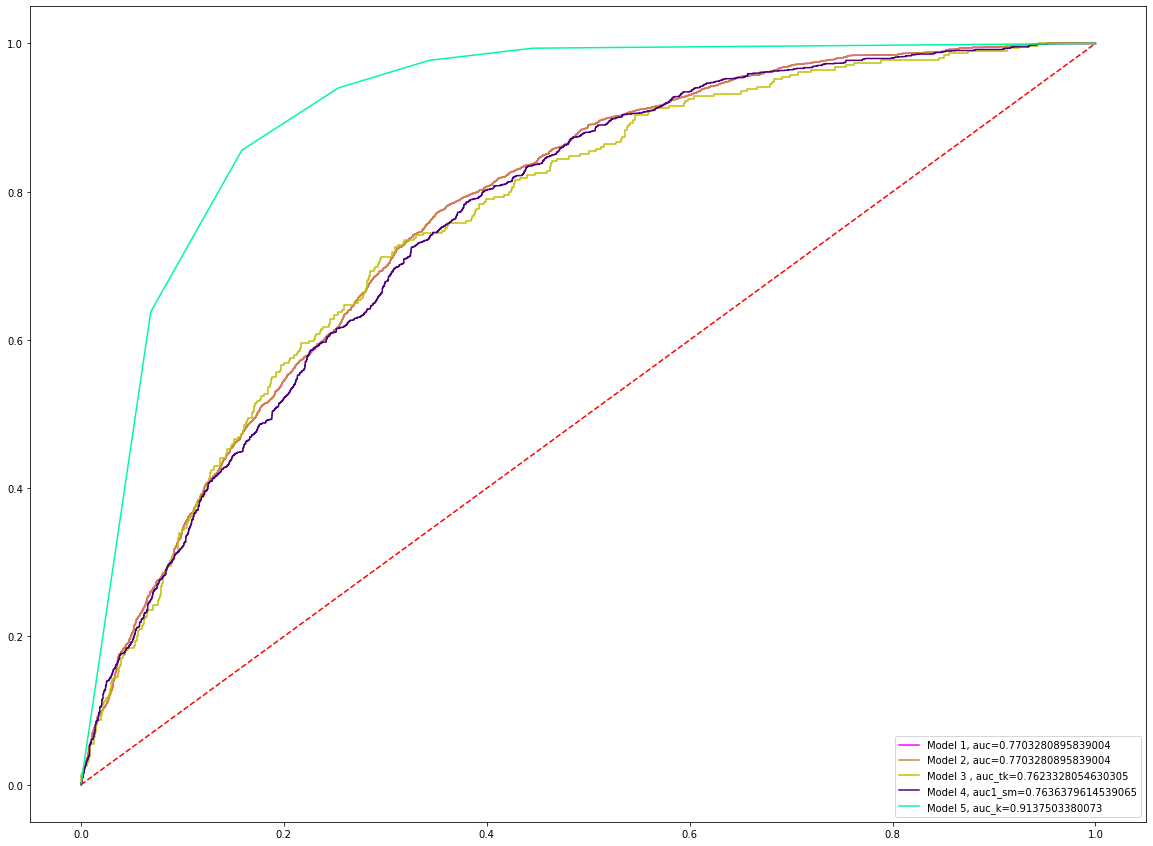

In [134]:
yk_pred_proba = Knn.predict_proba(X1_sm_test)[::,1]
fpr_k, tpr_k, _ = metrics.roc_curve(y1_sm_test,  yk_pred_proba)
auc_k = metrics.roc_auc_score(y1_sm_test, yk_pred_proba)

plt.figure(figsize = (20, 15))
plt.plot(fpr,tpr,label="Model 1, auc="+str(auc), color='magenta')
plt.plot(fpr,tpr,label="Model 2, auc="+str(auc), color='peru')
plt.plot(fpr_tk,tpr_tk,label="Model 3 , auc_tk="+str(auc_tk), color='y')
plt.plot(fpr1_sm,tpr1_sm,label="Model 4, auc1_sm="+str(auc1_sm), color='indigo')
plt.plot(fpr_k,tpr_k,label="Model 5, auc_k="+str(auc_k), color='mediumspringgreen')
plt.plot([0,1],[0,1],'r--') 
plt.legend(loc=4)
plt.show()

# BONUS: Model 6 - Using the features that seem to have more impact in the target variable

After doing some visualizations in Tableau and analysing the impact of the different fields in our target variable, we came up with the conclusion that four specific features seem to have a remarkable impact in our target variable. These features are: **'Reward', 'Mailer_Type', 'Income_Level'** and **'Credit_Rating'**. For these reason, we have decide to run a new model including only these four fields.

## Dropping the variables that don't seem to impact the target value

In [102]:
df2 = df1.drop(["Bank_Accounts_Open", "Overdraft_Protection", "Credit_Cards_Held", "Homes_Owned", "Household_Size", "Own_Your_Home", "Average_Balance"], axis = 1)

In [103]:
df2.head()

,Offer_Accepted,Reward,Mailer_Type,Income_Level,Credit_Rating
0,No,Air Miles,Letter,High,High
1,No,Air Miles,Letter,Medium,Medium
2,No,Air Miles,Postcard,High,Medium
3,No,Air Miles,Letter,Medium,High
4,No,Air Miles,Letter,Medium,Medium


In [104]:
df2.columns

Index(['Offer_Accepted', 'Reward', 'Mailer_Type', 'Income_Level',
       'Credit_Rating'],
      dtype='object')

## Getting dummies

In [105]:
categorical_new = categorical = pd.get_dummies(df2,
               drop_first=True,
               columns=["Offer_Accepted",'Reward', 'Mailer_Type', 'Income_Level',
       'Credit_Rating'])

In [106]:
categorical_new.head()

,Offer_Accepted_Yes,Reward_Cash Back,Reward_Points,Mailer_Type_Postcard,Income_Level_Low,Income_Level_Medium,Credit_Rating_Low,Credit_Rating_Medium
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1
2,0,0,0,1,0,0,0,1
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,1


## Isolating the target variable

In [107]:
y_new = categorical_new["Offer_Accepted_Yes"]

In [108]:
categorical_new_clean = categorical_new.drop(["Offer_Accepted_Yes"], axis = 1)

## Concatenating categorical_new_clean and y_new

In [109]:
X_full_new = pd.concat([categorical_new_clean, y_new], axis = 1)

In [110]:
X_full_new.head()

,Reward_Cash Back,Reward_Points,Mailer_Type_Postcard,Income_Level_Low,Income_Level_Medium,Credit_Rating_Low,Credit_Rating_Medium,Offer_Accepted_Yes
0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0
2,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,1,0


## Aplying SMOTE to X and Y

In [111]:
X_new_sm, y_new_sm =smote.fit_resample(categorical_new_clean,y_new)

## Analysing the change in the distribution

In [112]:
y_new.value_counts()

0    16955
1     1021
Name: Offer_Accepted_Yes, dtype: int64

In [113]:
y_new_sm.value_counts()

0    16955
1    16955
Name: Offer_Accepted_Yes, dtype: int64

## Defining Knn giving it 5 neighbours

In [114]:
Knn1=KNeighborsClassifier(n_neighbors = 5, p = 2)

## Splitting X_new_sm and y_new_sm into train and test set

In [115]:
X_new_sm_train, X_new_sm_test, y_new_sm_train, y_new_sm_test = train_test_split (X_new_sm, y_new_sm, test_size = 0.3, random_state=40)

## Fitting Knn to our new training sets

In [116]:
Knn1.fit(X_new_sm_train,y_new_sm_train)

KNeighborsClassifier()

# BONUS: Evaluating Model 6

## Predicting the response for the new smote test dataset using Knn1

In [117]:
y_new_pred_k = Knn1.predict(X_new_sm_test)

## Obtaining the accuracy of the prediction

In [118]:
accuracy_score(y_new_sm_test,y_new_pred_k)

0.6257741079327632

## Creating the new Confusion Matrix

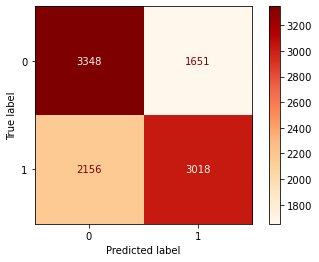

In [119]:
plot_confusion_matrix(Knn1 ,X_new_sm_test,y_new_sm_test, cmap="OrRd");

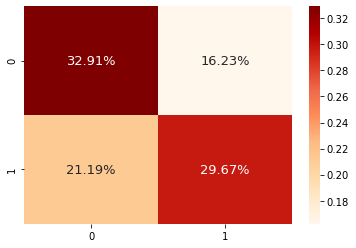

In [120]:
cnfmat = confusion_matrix(y_new_sm_test, y_new_pred_k)
df_cm = pd.DataFrame(cnfmat, columns = np.unique(y_new_sm_test), index = np.unique(y_new_sm_test))
sns.heatmap(df_cm/df_cm.sum().sum(),
           annot=True,
            fmt='.2%',
            cmap='OrRd',
            annot_kws = {'size':13}
           );

## Plotting the new AUC (area under the curve)

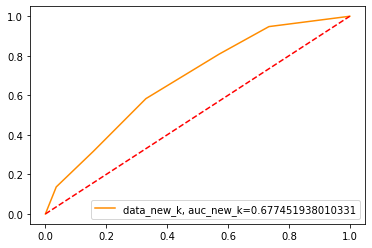

In [121]:
y_new_k_pred_proba = Knn1.predict_proba(X_new_sm_test)[::,1]
fpr_new_k, tpr_new_k, _ = metrics.roc_curve(y_new_sm_test,  y_new_k_pred_proba)
auc_new_k = metrics.roc_auc_score(y_new_sm_test, y_new_k_pred_proba)

plt.plot(fpr_new_k,tpr_new_k,label="data_new_k, auc_new_k="+str(auc_new_k), color='darkorange')
plt.plot([0,1],[0,1],'r--') 
plt.legend(loc=4)
plt.show()

## Conclusions from BONUS Model 6

The results obtained with this model are much worst than the ones obtained with Model 5, so we can conclude that there should be other features that also have impact over our target variable, even if the impact is lower.